In [10]:
#pip install librosa
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [125]:
### Load File
target = "../test/bg_music.pcm"
f=open(target, 'rb')
buf = bytearray(f.read())
pcm_data = np.frombuffer(buf, dtype = 'int16')			# pcm file is 16bit, 8000hz, mono format
wav_data = librosa.util.buf_to_float(x=pcm_data, n_bytes=2)
print(len(wav_data))
print(len(pcm_data))

9762540
9762540


1220.317375


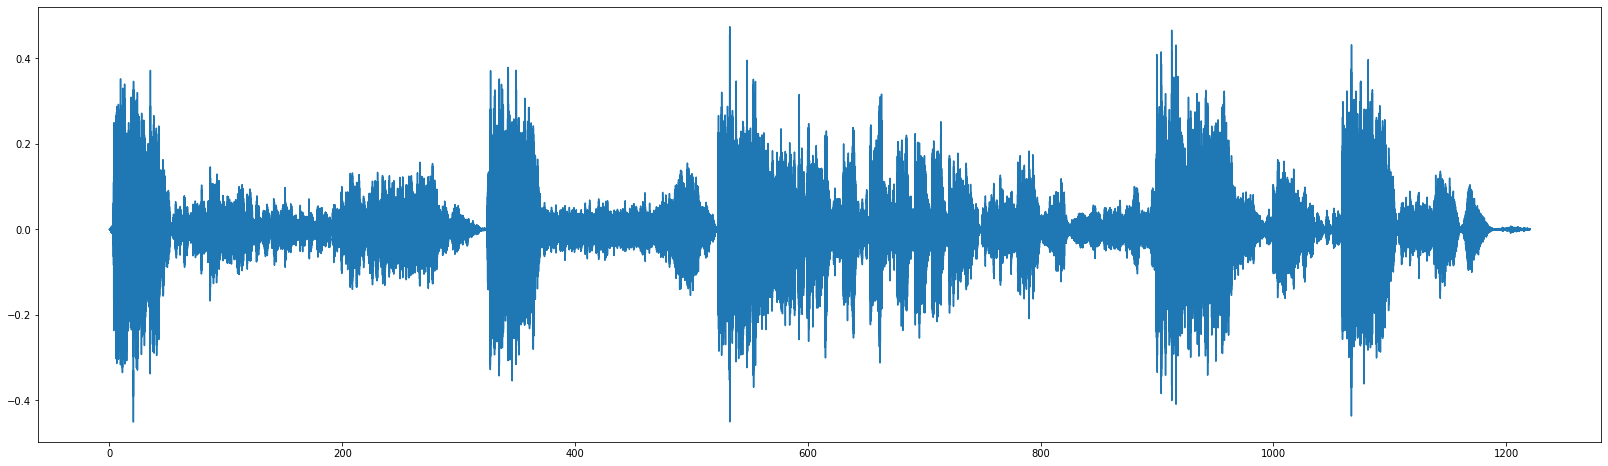

In [130]:
### Draw Graph
x_axis = [i/8000 for i in range(0, len(wav_data))]	# Calculate x axis max value

print(max(x_axis))
plt.figure(figsize=(28,8))
plt.plot(x_axis, wav_data)		
plt.show()

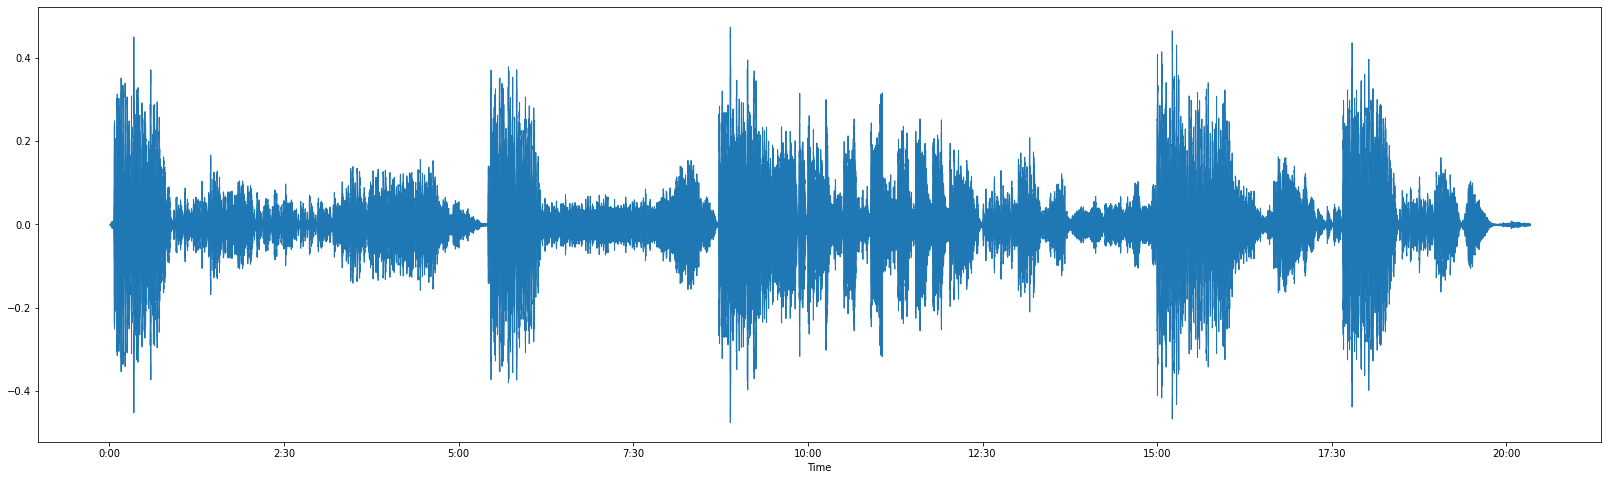

In [131]:
plt.figure(figsize=(28,8))
librosa.display.waveshow(wav_data, sr=8000)

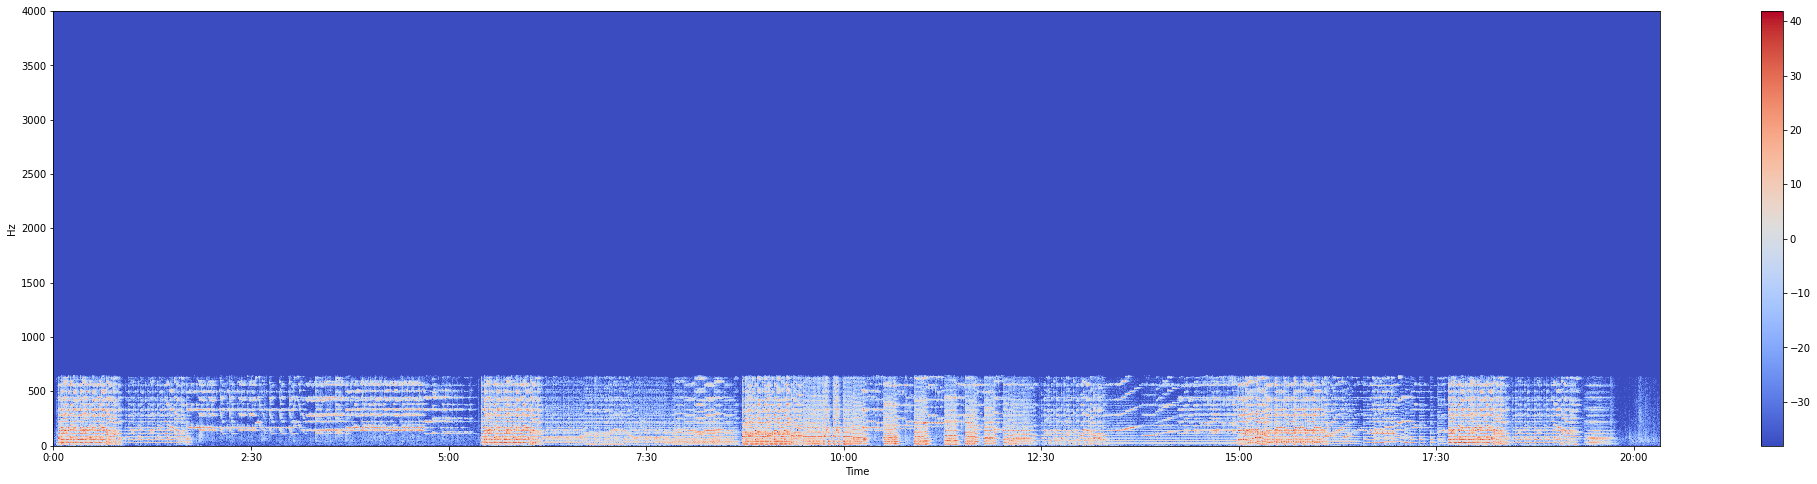

In [115]:
X = librosa.stft(wav_data)
X_mag = abs(X)

# energy levels(dB) 로 변경
Xdb = librosa.amplitude_to_db(X_mag)

plt.figure(figsize=(36, 8))
librosa.display.specshow(Xdb, sr=8000, x_axis='time', y_axis='hz')
plt.colorbar()

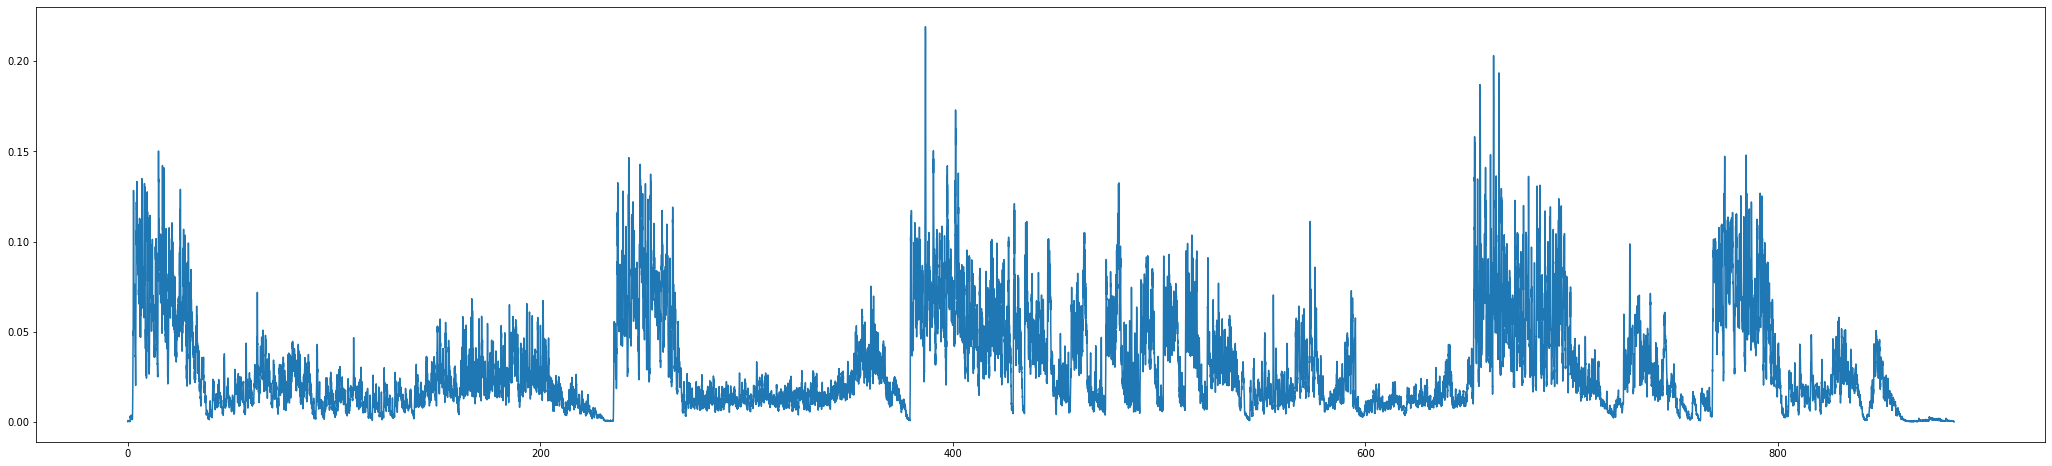

In [136]:
FRAME_LENGTH=512
HOP_LENGTH = 256

rms = librosa.feature.rms(y=wav_data, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
times = librosa.times_like(rms)
plt.figure(figsize=(36, 8))
plt.plot(times, rms[0])

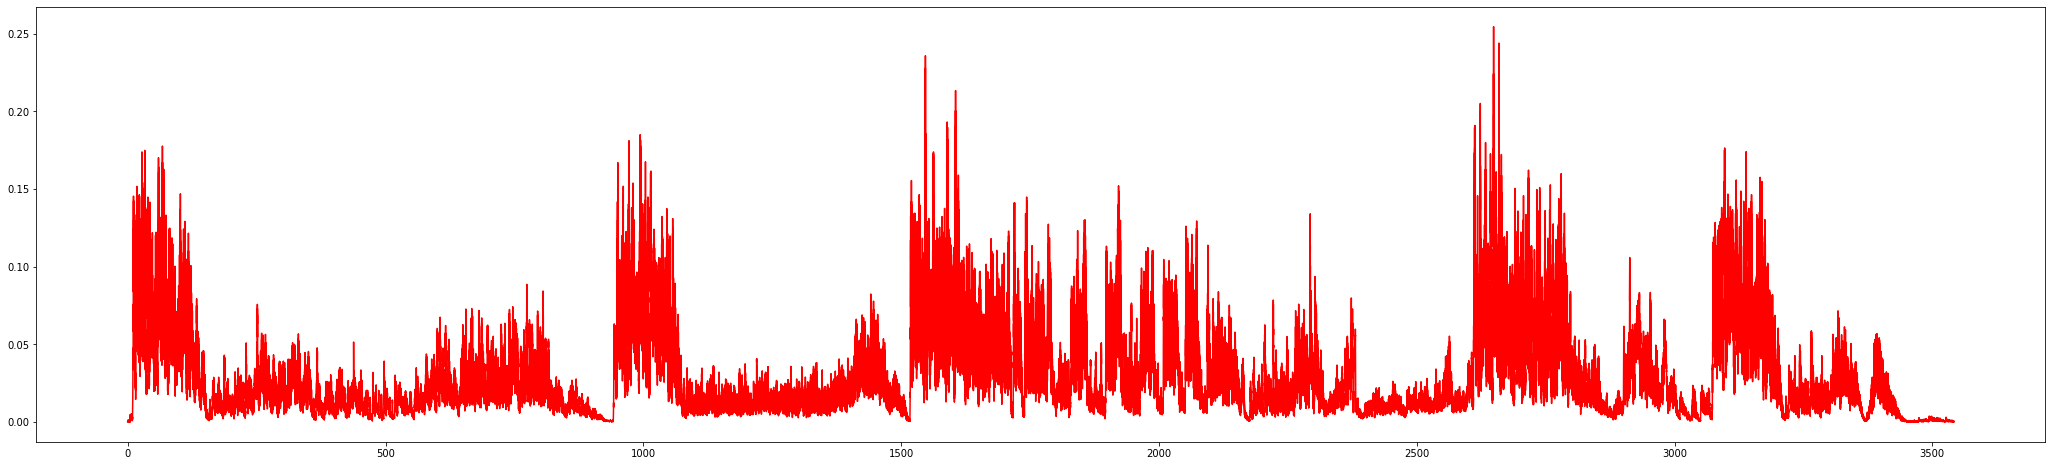

In [137]:
FRAME_LENGTH=128
HOP_LENGTH = 64

rms = librosa.feature.rms(y=wav_data, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
times = librosa.times_like(rms)
plt.figure(figsize=(36, 8))
plt.plot(times, rms[0], "r")


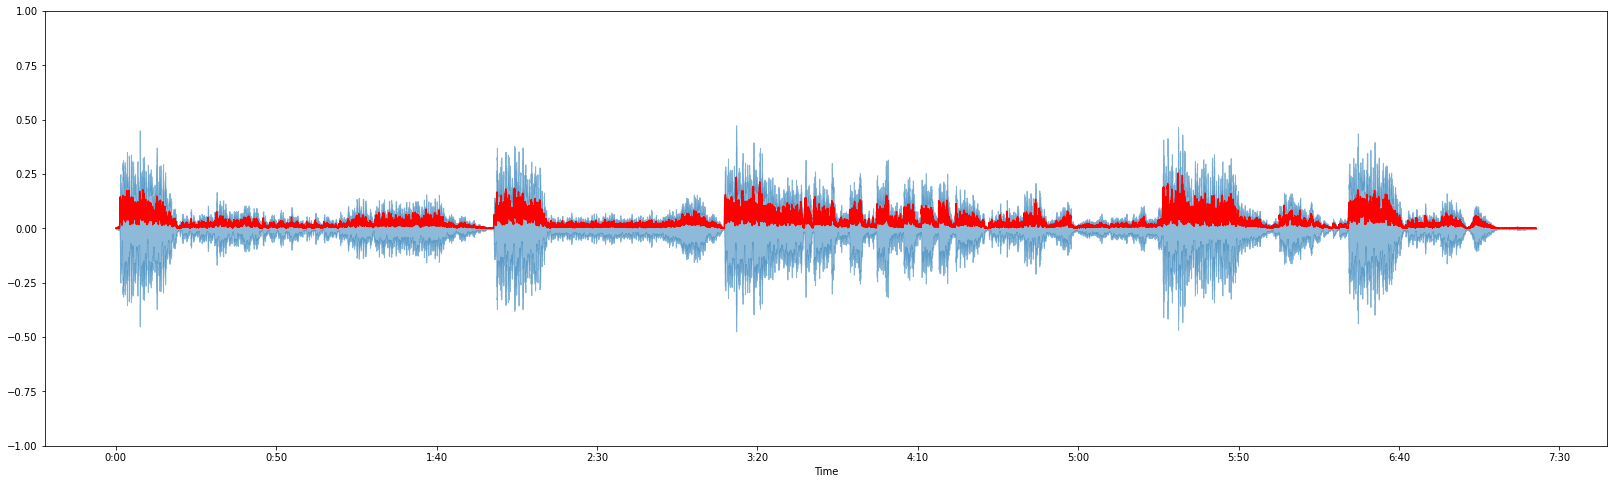

In [138]:
frames = range(len(rms[0]))
plt.figure(figsize=(28,8))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)
librosa.display.waveshow(wav_data, alpha=0.5)

plt.plot(t, rms[0], "r")
plt.ylim(-1, 1)
plt.show()


In [140]:
print('MAX rms energy:', rms[0].max())
print('MIN rms energy:', rms[0].min())
print('mean rms energy:', rms[0].mean())


MAX rms energy: 0.25453013
MIN rms energy: 1.9637357e-05
mean rms energy: 0.029918293
